<a href="https://colab.research.google.com/github/PUBPOL-2130/notebooks/blob/main/helper-notebooks/DownloadingGeospatialData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt

# Sharing and Importing Spatial Data

There are many ways to access geospatial for homeworks and projects.

1. You can *download and store data locally.* This is perhaps the easiest and most straightforward approach!
* Shapefiles, as discussed in class and lab, are stored in a folder with many files. It's important when sharing and importing shapefile data that all files remain in this folder. We recommend zipping shapefiles when sharing or transferring the data. Shapefiles are widely considered the industry standard in geography and GIS.
* GeoJSON files are another file format that you can download and store locally. They are easy to read and write, as there is only a single file for each dataset. One downside is that GeoJSON files must be read into memory all at once, so they can be slower to load compared to shapefiles.
* Lastly, GeoPackage files are another option. They are also easy to read and write, and only produce one file per dataset. They can handle large datasets well, are compatible with most GIS software, and generally load faster than GeoJSON files.

2. You can also import data *directly from an API endpoint,* as we've seen with Census geospatial data.
* **Note:** This approach does not require you to download any files locally (i.e., saving to your computer), which can make it easier to share your projects with others.
* For example, most Open Data platforms have an API that you can use to access the data just with a URL.

## Example: Loading NYC Boroughs Geospatial via the API

We will be loading a polygon dataset of [NYC census tracts](https://data.cityofnewyork.us/City-Government/2020-Census-Tracts/63ge-mke6/data) via the [Socrata Open Data API](https://dev.socrata.com/consumers/getting-started.html) from the NYC Open Data Portal. We will load the data as a *GeoJSON file.*

In [13]:
# Step 1: Store the API endpoint
# Note (important!): change the file extension to geojson for spatial data
# we also have specify the limit parameter
# otherwise it will only load a subset of the data
url = "https://data.cityofnewyork.us/resource/63ge-mke6.geojson?$limit=1000000"

In [14]:
# Step 2: Read data from url using geopandas function
nyc_tracts = gpd.read_file(url)

In [15]:
# Data is loaded!
nyc_tracts.head()

,shape_area,ntaname,cdtaname,shape_leng,boroname,ct2020,nta2020,borocode,cdeligibil,geoid,boroct2020,cdta2020,ctlabel,geometry
0,1843004.52241,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),10833.0439286,Manhattan,000100,MN0191,1,None,36061000100,1000100,MN01,1,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,1006116.58429,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.33199978,Manhattan,001401,MN0302,1,None,36061001401,1001401,MN03,14.01,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ..."
2,1226206.24719,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.1560187,Manhattan,001402,MN0302,1,None,36061001402,1001402,MN03,14.02,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ..."
3,2399276.86435,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6391.92117449,Manhattan,001800,MN0302,1,None,36061001800,1001800,MN03,18,"MULTIPOLYGON (((-73.98985 40.72052, -73.98972 ..."
4,1740173.87581,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5779.06260724,Manhattan,002201,MN0302,1,None,36061002201,1002201,MN03,22.01,"MULTIPOLYGON (((-73.97875 40.71993, -73.97879 ..."


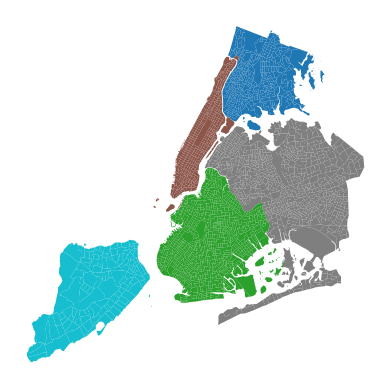

In [16]:
# We can plot our data
ax = nyc_tracts.plot(column='boroname')
ax.set_axis_off()
plt.show()

## Using the API, we can also filter the data before we import it

**Add the following to the URL:**
`?` + `$where=` + "`COLUMN_NAME`" + `=` + "`VALUE`"

*Note:* `COLUMN_NAME` and `VALUE` are specific to your query. If `VALUE` is a string, then we will need to add `'` on either side `'` to denote it as such.

In [22]:
# Step 1: Define parameters and the new url
COLUMN_NAME = "boroname"
VALUE = "Manhattan"
base_url = "https://data.cityofnewyork.us/resource/63ge-mke6.geojson"
url_filt = base_url + "?" + "$where=" + COLUMN_NAME + "=" + "'" + VALUE + "'" + "&$limit=1000000"
url_filt

"https://data.cityofnewyork.us/resource/63ge-mke6.geojson?$where=boroname='Manhattan'&$limit=1000000"

In [23]:
# Step 2: Load data
mn = gpd.read_file(url_filt)

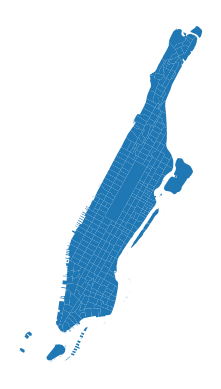

In [25]:
# Plotting only Manhattan
ax = mn.plot(column='boroname')
ax.set_axis_off()
plt.show()